# **Рассмотрение разрежености карт (индекса Джини) для классов, определяемых нейронной сетью с разной точностью**

Все анализируемые наборы данных доступны к скачиванию здесь: https://github.com/SadSabrina/ods_2023_gini_implementation/tree/85cc77fe3baa2ab7aeced83e238267167fef57d2/data

Для удобства скачайте на свой диск папку **data** и запишите путь к ней в переменную `YOUR_PATH_TO_DATA`

### **Раздел 1. Рассмотрение связи медианного индекса Джини и точности (accuracy) определения**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**1. Набор данных `cifar10ginis_data.csv`** \
Cодержит метрику точности (accuracy) модели и медианный индекс Джини для 3х способов рассмотрения активаций: Saliency map, Integrated Gradients, Deep Lift



In [3]:
YOUR_PATH_TO_DATA = ''

acc_data = pd.read_csv(f'{YOUR_PATH_TO_DATA}/cifar10ginis_data.csv', sep='\t', index_col=0)

In [4]:
acc_data

,class,accuracy,median_saliency_gini,median_ig_gini,median_dl_gini
0,plane,63.5,0.660143,0.583517,0.658295
1,car,66.1,0.644638,0.567317,0.648757
2,bird,36.2,0.665851,0.581783,0.667578
3,cat,33.0,0.641269,0.570733,0.643090
4,deer,61.0,0.662902,0.571977,0.666679
5,dog,52.4,0.650748,0.573091,0.654590
6,frog,70.3,0.647394,0.571009,0.650454
7,horse,79.8,0.657219,0.570528,0.660792
8,ship,73.9,0.658587,0.571667,0.658412
9,truck,69.6,0.640304,0.558878,0.642252


Посмотрим разницу индекса Джини для классов с максимальной и минимальной точностью предсказания:


In [5]:
min_accuracy = acc_data['accuracy'].min()
max_accuracy = acc_data['accuracy'].max()

acc_data.query('accuracy == @min_accuracy or accuracy == @max_accuracy') #.head()

,class,accuracy,median_saliency_gini,median_ig_gini,median_dl_gini
3,cat,33.0,0.641269,0.570733,0.643090
7,horse,79.8,0.657219,0.570528,0.660792


Запишем классы с лучшим и худшим прогнозом отдельно — они поадобятся для дальнейшего анализа 

In [6]:
#Запишем классы с лучшим и худшим прогнозом отдельно — онпадобится для дальнейшего анализа 
best_and_baddest = ['cat', 'horse']

#### **Наблюдение:**
1. Для методов Salincy map и deep lift есть разница на уровне сотых. Однако, учитывая разницу в точности (79.8 и 33) она не кажется значительной. 

Посмотрим на общее распределение точности и индекса Джини для всех классов:

In [7]:
def get_accuarcy_gini_plot(x, method_code, title=True):

  """Code of methods saliency = Saliency Map, ig = Integrated Gradients, dl = Deep Lift"""
  
  title_dict = {'saliency' : 'Saliency map', 'ig' : 'Integrated Gradients', 'dl' : 'Deep Lift'}
  plt.plot(x, acc_data[f'median_'+method_code+'_gini'], 'o')
  plt.xlabel('Accuracy на класс')
  plt.ylabel('Медианный индекс Джини')

  if title:
    plt.title(f'Оценка связи медианного индекса Джини метода {title_dict[method_code]}\n и точности прогноза на класс')

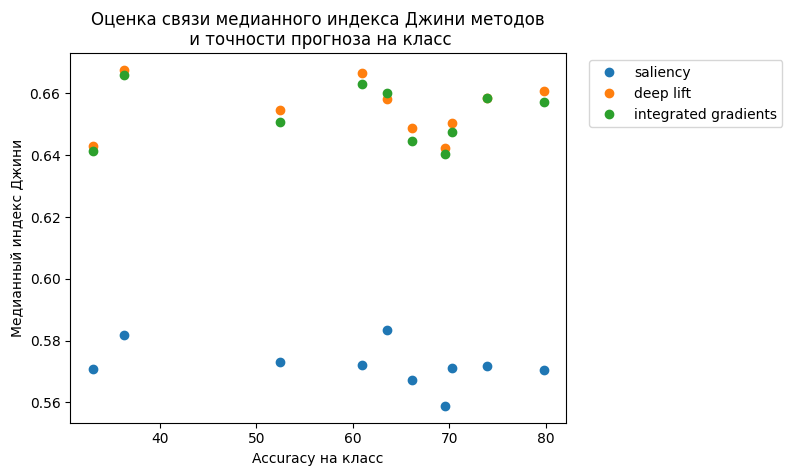

In [8]:
plt.plot(acc_data['accuracy'], acc_data[f'median_ig_gini'], 'o')
plt.plot(acc_data['accuracy'], acc_data[f'median_dl_gini'], 'o')
plt.plot(acc_data['accuracy'], acc_data[f'median_saliency_gini'], 'o')

plt.xlabel('Accuracy на класс')
plt.ylabel('Медианный индекс Джини')

plt.legend(['saliency', 'deep lift', 'integrated gradients'], loc='upper right', bbox_to_anchor=(1, 0., 0.45, 1))
plt.title(f'Оценка связи медианного индекса Джини методов\n и точности прогноза на класс')
plt.show()

Также, для наглядности масштаба, можно посмотреть индекс Джини для каждого из методов отдельно:

Метод 1.


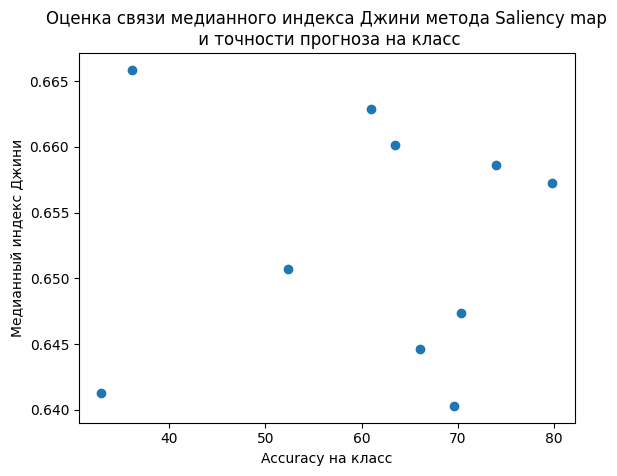

Метод 2.


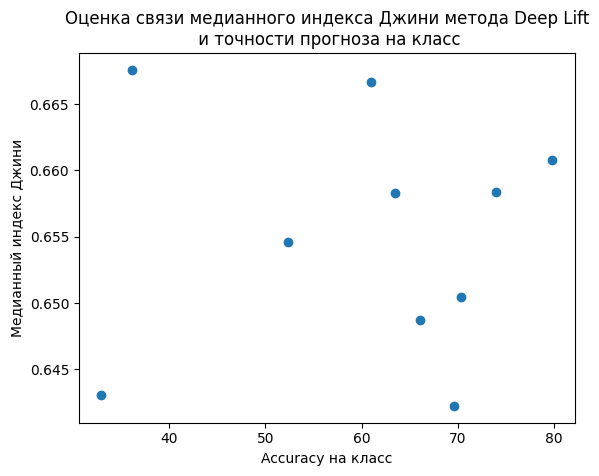

Метод 3.


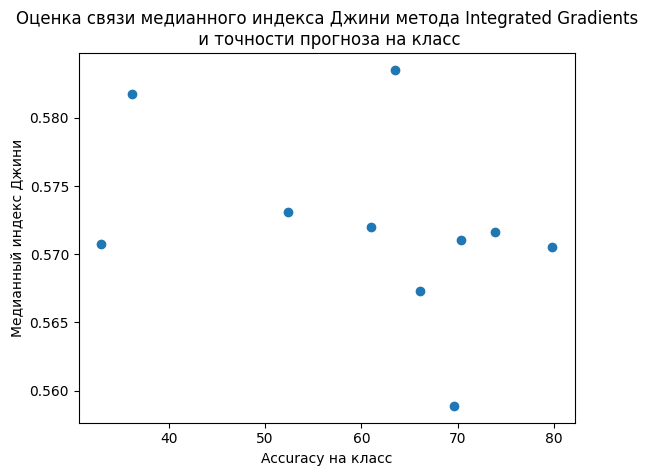

In [9]:
for number, method in enumerate(['saliency', 'dl', 'ig']):

  print(f"Метод {number+1}.")

  plt.figure()
  get_accuarcy_gini_plot(acc_data['accuracy'], method, title=True)
  plt.show()



### **2. Рассмотрение распределения разреженности карт для каждого наблюдения каждого из классов тестовой выборки**

Данные содержат индекс Джини для соответствующего вида карт (saliency map, integrated gradients, deep lift) для каждого наблюдение из тестового набора данных. 

**Загрузка данных:**

In [13]:
#Saliency Map
saliency_data = pd.read_csv(f'{YOUR_PATH_TO_DATA}/saliency_data.csv', index_col=0)

#Deep Lift
dl_data = pd.read_csv(f'{YOUR_PATH_TO_DATA}/dl_data.csv', index_col=0)

#Integrated Gradients
ig_data = pd.read_csv(f'{YOUR_PATH_TO_DATA}/ig_data.csv', index_col=0)

In [14]:
saliency_data.head()

,plane,car,bird,cat,deer,dog,frog,horse,ship,truck
0,0.602840,0.525779,0.577823,0.578338,0.585595,0.555926,0.589304,0.575840,0.572195,0.530345
1,0.597276,0.561192,0.552594,0.587551,0.547546,0.540240,0.552713,0.570993,0.571160,0.564655
2,0.582583,0.562376,0.568918,0.592120,0.527476,0.606463,0.569380,0.583378,0.565561,0.568882
3,0.580825,0.581347,0.560425,0.586985,0.568656,0.584788,0.581405,0.559261,0.557428,0.549490
4,0.609454,0.570649,0.617550,0.573744,0.580071,0.568341,0.573292,0.572228,0.553278,0.560656


Рассмотрим два типа визуализаций — **боксплоты**, для оценки разробосов и аномалий в распределениях и **линейный график** — для взгляда на все наблюдения. 

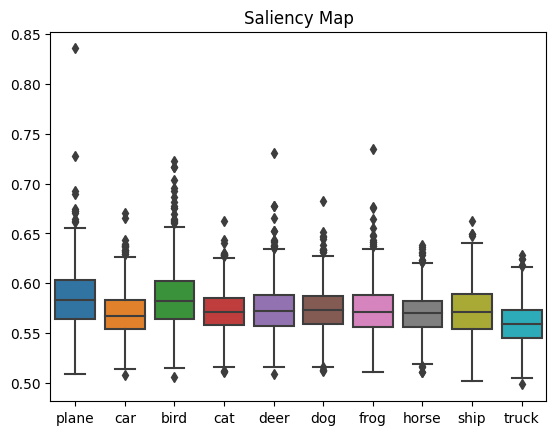

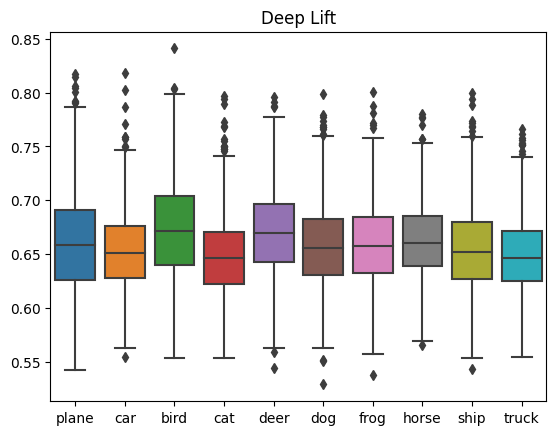

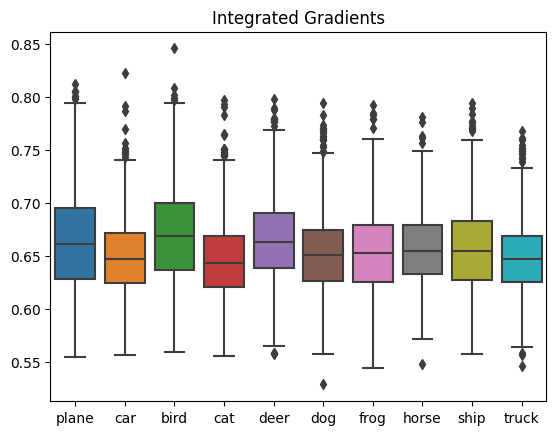

In [15]:
datasets = [saliency_data, dl_data, ig_data]
methods = ['Saliency Map', 'Deep Lift', 'Integrated Gradients']

for data, method in zip(datasets, methods):
  plt.figure()
  sns.boxplot(data)
  plt.title(method)
  plt.show()

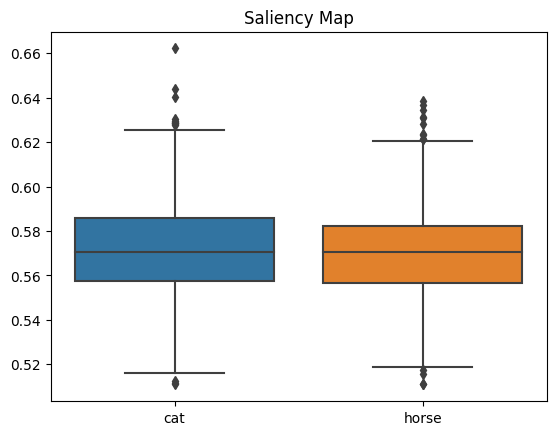

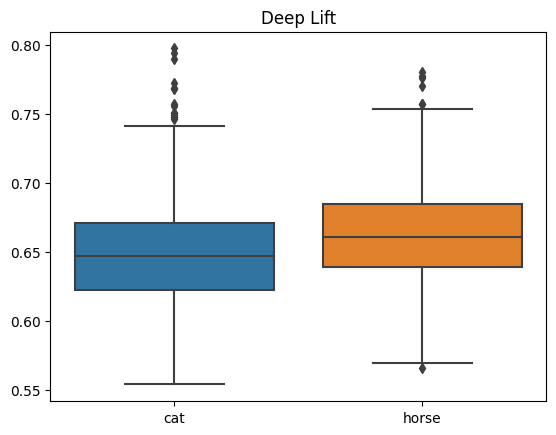

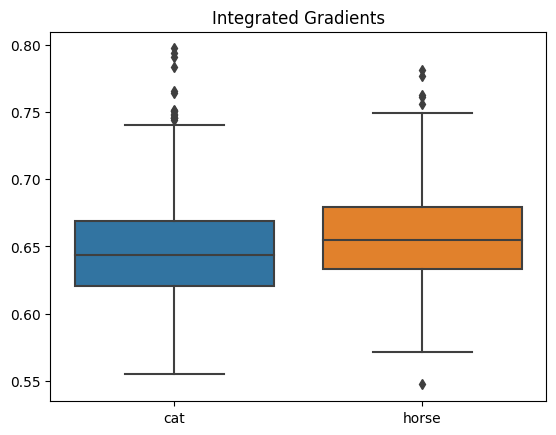

In [16]:
for data, method in zip(datasets, methods):
  plt.figure()
  sns.boxplot(data[best_and_baddest])
  plt.title(method)
  plt.show()

#### **Наблюдение:**
2. Аналогично числовым показателям, диаграммы размаха показывают, что связи разреженности карт и точности определения класса нет. \

Построим линейный график:

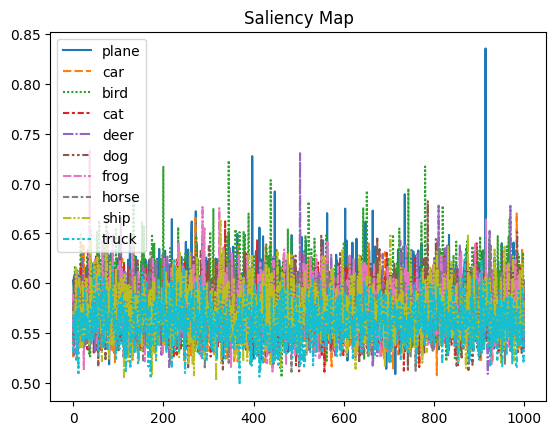

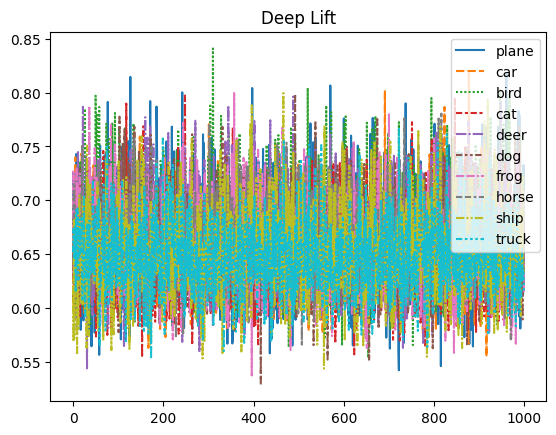

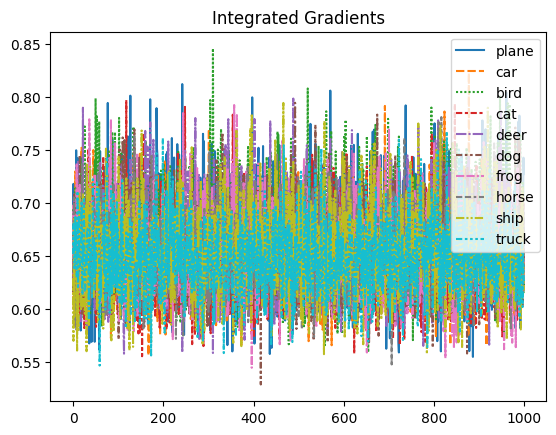

In [17]:
for data, method in zip(datasets, methods):
  
  plt.figure()
  sns.lineplot(data)
  plt.title(method)
  plt.show()

И также рассмотрим частнотный график:

<Figure size 640x480 with 0 Axes>

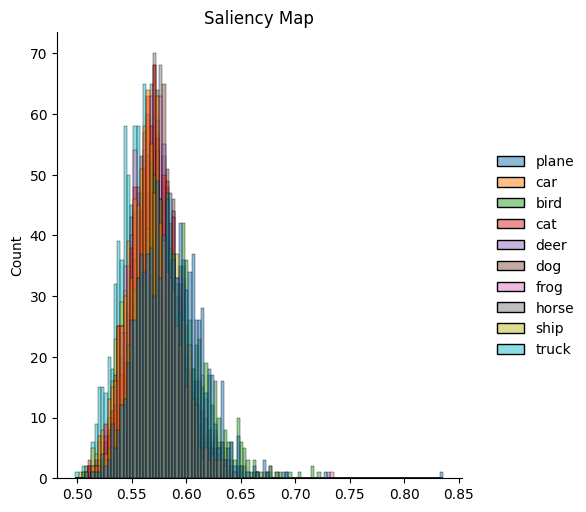

<Figure size 640x480 with 0 Axes>

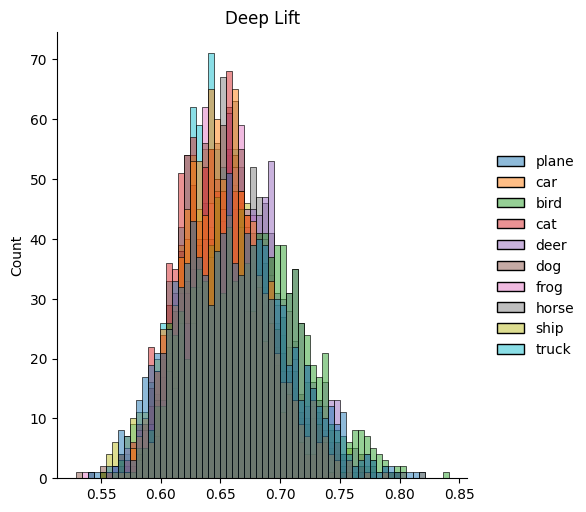

<Figure size 640x480 with 0 Axes>

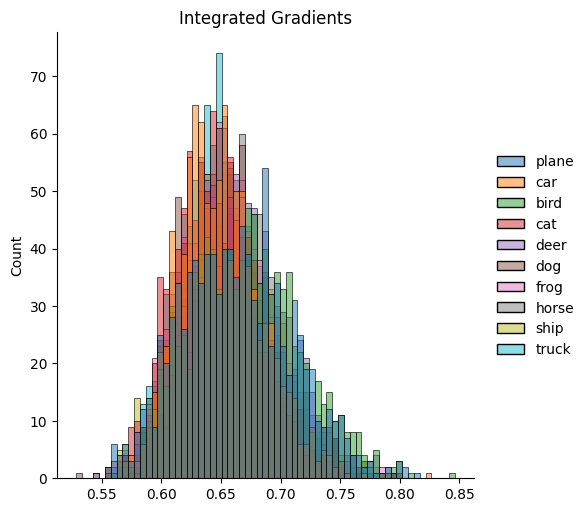

In [18]:
for data, method in zip(datasets, methods):
  
  plt.figure()
  sns.displot(data)
  plt.title(method)
  plt.show()

И в завершение, в силу нечитаемости линейного графика для всех наблюдений, а также с целью выявить закономерности длдя "низа" и "верха", построим линейный график для наблюдений только с лучшей и худшими точностями:


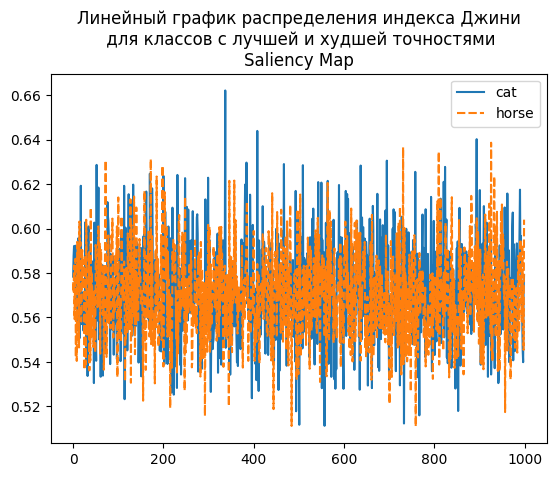

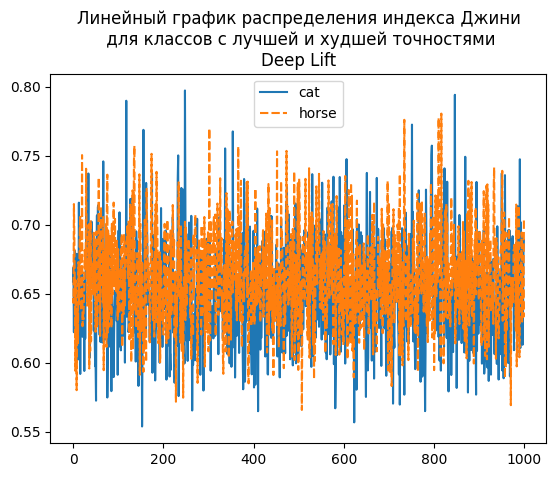

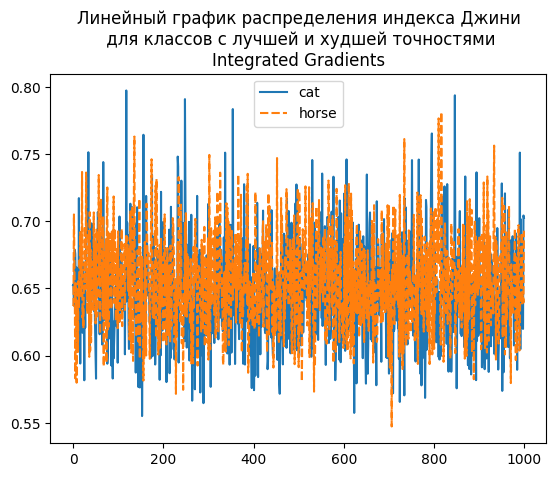

In [19]:
for data, method in zip(datasets, methods):

  plt.figure()
  sns.lineplot(data[best_and_baddest])
  plt.title("Линейный график распределения индекса Джини\n для классов с лучшей и худшей точностями\n"+method)
  plt.show()

И аналогично для оценки "верха" и "низа" выстроим частотный график для наблюдений с лучшей и худшими точностями:

<Figure size 640x480 with 0 Axes>

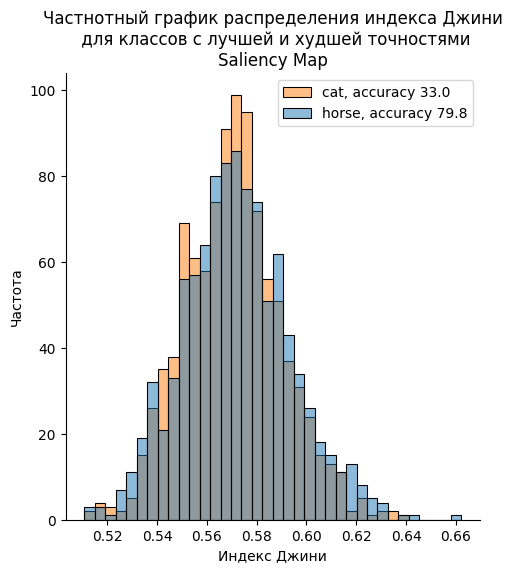

<Figure size 640x480 with 0 Axes>

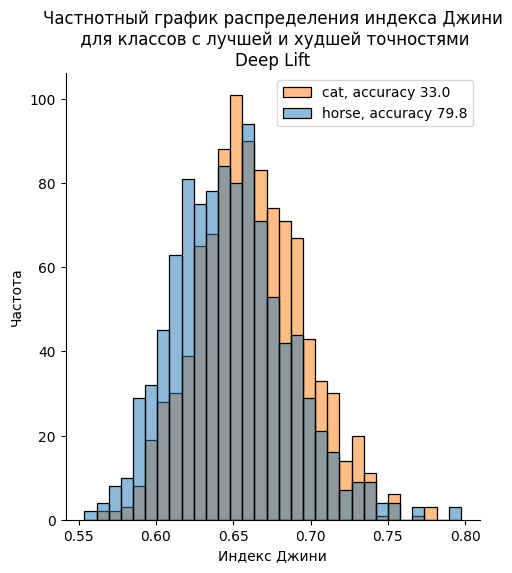

<Figure size 640x480 with 0 Axes>

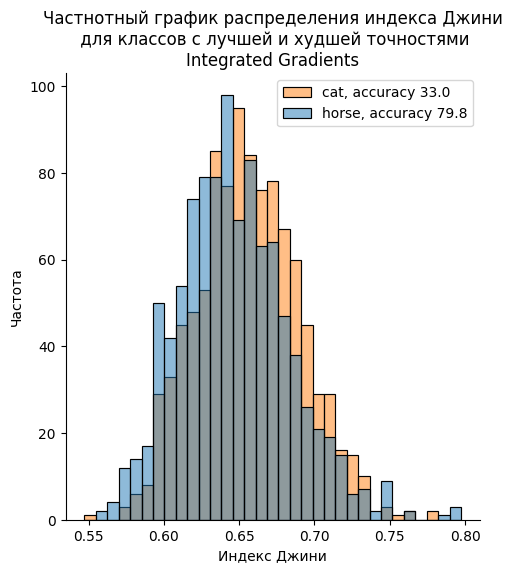

In [20]:
for data, method in zip(datasets, methods):

  plt.figure()
  sns.displot(data[best_and_baddest], legend=False)
  plt.legend(['cat, accuracy 33.0', 'horse, accuracy 79.8']) 
  plt.xlabel("Индекс Джини")
  plt.ylabel("Частота")
  plt.title("Частнотный график распределения индекса Джини\n для классов с лучшей и худшей точностями\n"+method)
  plt.show()


#### **Наблюдение:**
3. По тестовым данным в 1000 изображений, индекс Джини напоминает график белого , а учитывая нормальное распределение индекса Джини для классов — гауссовского шума.

### **Общий вывод**

1. Индекс Джини действительно помогает оценить степень разреженности карт;
2. Связи точности определения класса и разреженности карт активации **здесь** нет;
3. Связаны ли выводы с природой данных или с тем, что разреженность не влияет не способность определять класс — открытый вопрос.


Буду рада, если кому-то удастся провести эксперименты на других данных! Обязательно делитесь, что получится у вас! 📈

Мой телеграмм: https://t.me/jdata_blog \

Отличных анализов! 😄 \

**По некоторой традиции,  \
Ваш Дата автор**